In [1]:
import os
from datetime import datetime, timedelta, timezone
import matplotlib.pyplot as plt
from skyfield.api import load, EarthSatellite
from statistics import mean, stdev, variance
import numpy as np

In [2]:
# Load starlink TLE data
def parse_tle_epoch(epoch):
    year = int(epoch[:2])
    if year < 57:
        year += 2000
    else:
        year += 1900
    day_of_year = float(epoch[2:])
    day = int(day_of_year)
    fractional_day = day_of_year - day
    date = datetime(year, 1, 1, tzinfo=timezone.utc) + timedelta(days=day - 1)
    time_of_day = timedelta(days=fractional_day)
    return date + time_of_day

In [3]:
# load tle data and order by time
document_file = 'Starlink_TLE/Single_Satellite_TLE'
satellite_name = 'STARLINK-1007'
tle_file = os.path.join(document_file, f'{satellite_name}.txt')
tle_data = []

with open(tle_file, 'r') as file:
    lines = file.readlines()
    i = 0
    while i < len(lines):
        if lines[i].startswith(satellite_name):
            tle1 = lines[i+1].strip()
            tle2 = lines[i+2].strip()
            tle_epoch = parse_tle_epoch(tle1.split()[3])
            tle_data.append((tle_epoch, tle1, tle2))
            i += 3
        else:
            i += 1

tle_data.sort(key=lambda x: x[0])  # 按历元时间排序

In [4]:
# gemerate time series
start_time = datetime(2024, 1, 1, tzinfo=timezone.utc)
end_time = datetime(2024, 5, 31, tzinfo=timezone.utc)
time_step = timedelta(days=1)
time_series = [start_time + i * time_step for i in range((end_time - start_time) // time_step + 1)]

In [5]:
# 计算每个时间点的卫星海拔
ts = load.timescale()
altitudes = []
times = []

tle_index = 0

for current_time in time_series:
    # 更新TLE数据
    while tle_index < len(tle_data) - 1 and tle_data[tle_index + 1][0] <= current_time:
        tle_index += 1

    latest_tle = tle_data[tle_index]
    # 计算海拔
    satellite = EarthSatellite(latest_tle[1], latest_tle[2], satellite_name, ts)
    current_time_ts = ts.utc(current_time.year, current_time.month, current_time.day, current_time.hour, current_time.minute, current_time.second)
    geocentric = satellite.at(current_time_ts)
    subpoint = geocentric.subpoint()
    altitude = subpoint.elevation.km
    altitudes.append(altitude)
    times.append(current_time)

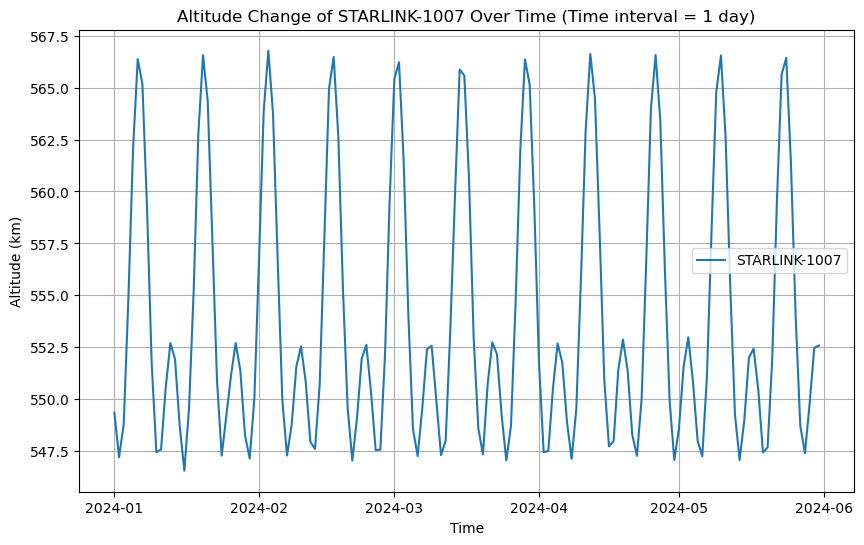

In [6]:
# 绘制海拔变化图
plt.figure(figsize=(10, 6))
plt.plot(times, altitudes, label=satellite_name)
plt.title(f'Altitude Change of {satellite_name} Over Time (Time interval = 1 day)')
plt.xlabel('Time')
plt.ylabel('Altitude (km)')
plt.grid(True)
plt.legend()
plt.show()

In [7]:
satellite.model.a

1.0858375420389785

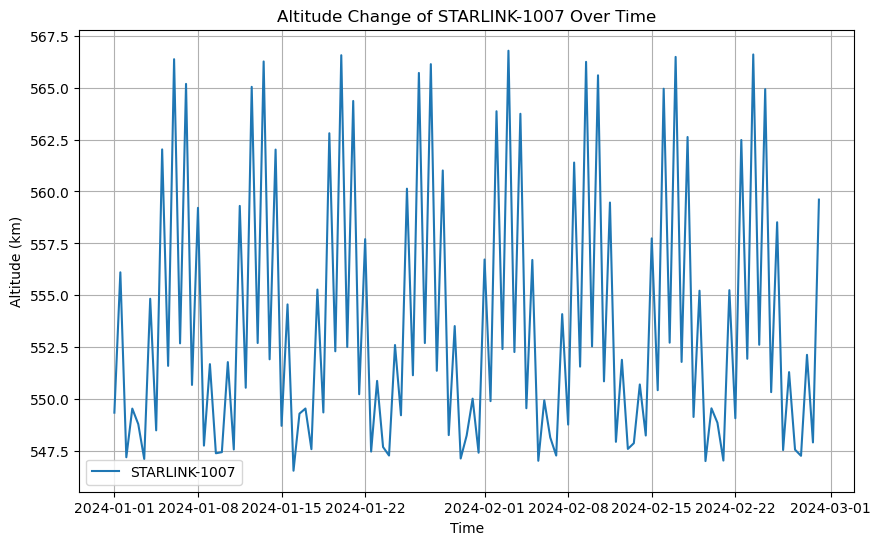

In [8]:
# gemerate time series
start_time = datetime(2024, 1, 1, tzinfo=timezone.utc)
end_time = datetime(2024, 2, 29, tzinfo=timezone.utc)
time_step = timedelta(hours = 12)
time_series = [start_time + i * time_step for i in range((end_time - start_time) // time_step + 1)]

# 计算每个时间点的卫星海拔
ts = load.timescale()
altitudes = []
times = []

tle_index = 0

for current_time in time_series:
    # 更新TLE数据
    while tle_index < len(tle_data) - 1 and tle_data[tle_index + 1][0] <= current_time:
        tle_index += 1

    latest_tle = tle_data[tle_index]
    # 计算海拔
    satellite = EarthSatellite(latest_tle[1], latest_tle[2], satellite_name, ts)
    current_time_ts = ts.utc(current_time.year, current_time.month, current_time.day, current_time.hour, current_time.minute, current_time.second)
    geocentric = satellite.at(current_time_ts)
    subpoint = geocentric.subpoint()
    altitude = subpoint.elevation.km
    altitudes.append(altitude)
    times.append(current_time)

# 绘制海拔变化图
plt.figure(figsize=(10, 6))
plt.plot(times, altitudes, label=satellite_name)
plt.title(f'Altitude Change of {satellite_name} Over Time')
plt.xlabel('Time')
plt.ylabel('Altitude (km)')
plt.grid(True)
plt.legend()
plt.show()

In [9]:
# load tle data and order by time
document_file = 'Starlink_TLE/Single_Satellite_TLE'
satellite_name = 'STARLINK-1007'
tle_file = os.path.join(document_file, f'{satellite_name}.txt')
tle_data = []

with open(tle_file, 'r') as file:
    lines = file.readlines()
    i = 0
    while i < len(lines):
        if lines[i].startswith(satellite_name):
            tle1 = lines[i+1].strip()
            tle2 = lines[i+2].strip()
            tle_epoch = parse_tle_epoch(tle1.split()[3])
            tle_data.append((tle_epoch, tle1, tle2))
            i += 3
        else:
            i += 1

tle_data.sort(key=lambda x: x[0])  # 按历元时间排序=


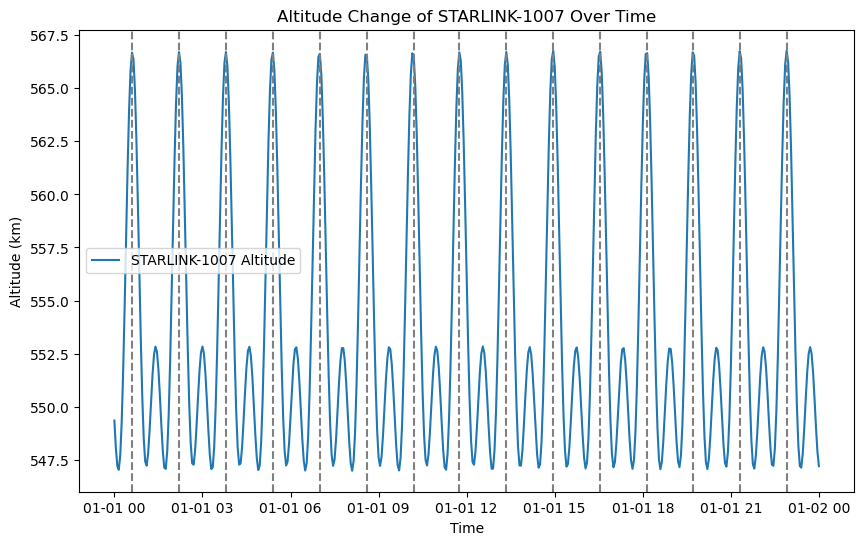

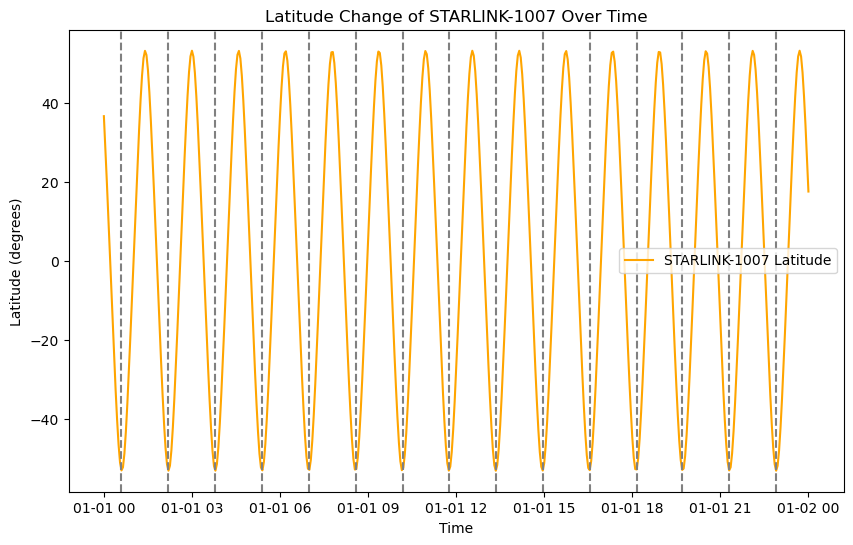

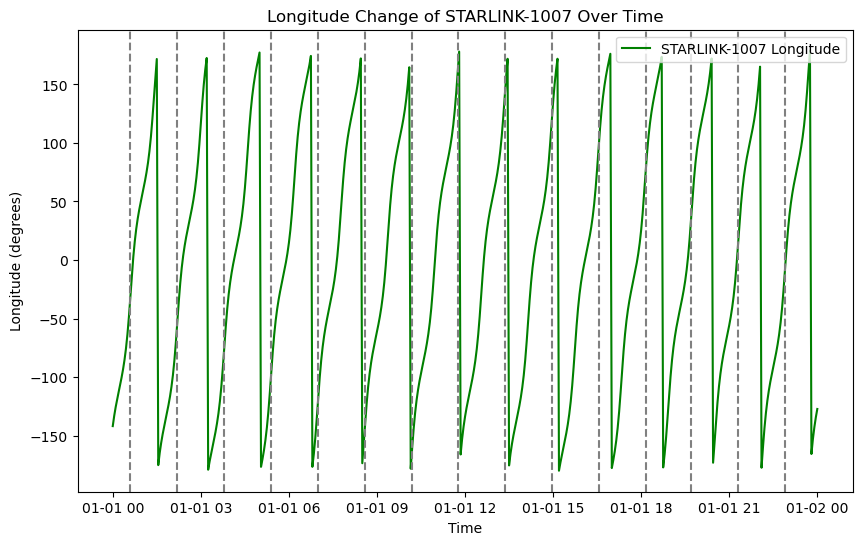

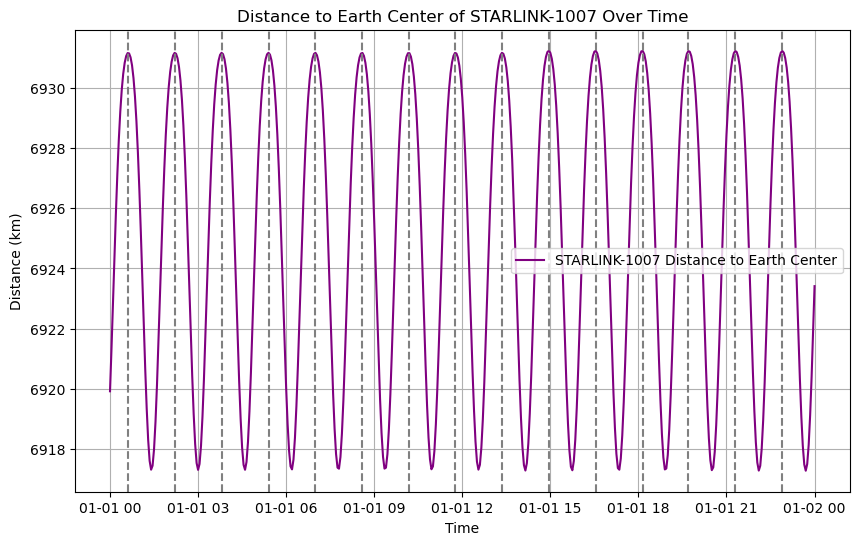

最短距离: 6917.27 km at 2024-01-01 23:42:00+00:00


In [12]:

# gemerate time series
start_time = datetime(2024, 1, 1, tzinfo=timezone.utc)
end_time = datetime(2024, 1, 2, tzinfo=timezone.utc)
time_step = timedelta(minutes = 3)
time_series = [start_time + i * time_step for i in range((end_time - start_time) // time_step + 1)]

# 计算每个时间点的卫星海拔
ts = load.timescale()
# 初始化存储数据的列表
altitudes = []
latitudes = []
longitudes = []
distances = []
periods = []
times = []
tle_update_times = []  # 记录TLE更新的时间点

tle_index = 0
last_tle_index = -1  # 记录上一个使用的TLE索引

# 记录局部最大值时间点
local_max_times = []

for current_time in time_series:
    # 更新TLE数据
    while tle_index < len(tle_data) - 1 and tle_data[tle_index + 1][0] <= current_time:
        tle_index += 1

    if tle_index != last_tle_index:
        tle_update_times.append(current_time)  # 记录TLE更新的时间点
        last_tle_index = tle_index

    latest_tle = tle_data[tle_index]
    # 计算海拔
    satellite = EarthSatellite(latest_tle[1], latest_tle[2], satellite_name, ts)
    current_time_ts = ts.utc(current_time.year, current_time.month, current_time.day, current_time.hour, current_time.minute, current_time.second)
    geocentric = satellite.at(current_time_ts)
    subpoint = geocentric.subpoint()
    altitude = subpoint.elevation.km
    latitude = subpoint.latitude.degrees
    longitude = subpoint.longitude.degrees

    altitudes.append(altitude)
    latitudes.append(latitude)
    longitudes.append(longitude)
    times.append(current_time)

    # 计算卫星距离地心的距离
    distance = geocentric.distance().km
    distances.append(distance)

    # calculate orbit period
    mean_motion = satellite.model.no_kozai
    orbital_period_seconds = (24 * 3600) / mean_motion
    orbital_period_hours = orbital_period_seconds / 3600
    periods.append(orbital_period_hours)

    # 检测局部最大值
    if len(distances) > 2 and  distances[-2] >  distances[-3] and  distances[-2] >  distances[-1]:
        local_max_times.append(times[-2])


# 绘制海拔变化图
plt.figure(figsize=(10, 6))
plt.plot(times, altitudes, label=f'{satellite_name} Altitude')
for max_time in local_max_times:
    plt.axvline(x=max_time, color='grey', linestyle='--')
plt.title(f'Altitude Change of {satellite_name} Over Time')
plt.xlabel('Time')
plt.ylabel('Altitude (km)')
plt.grid(False)
plt.legend()
plt.show()

# 绘制纬度变化图
plt.figure(figsize=(10, 6))
plt.plot(times, latitudes, label=f'{satellite_name} Latitude', color='orange')
for max_time in local_max_times:
    plt.axvline(x=max_time, color='grey', linestyle='--')
plt.title(f'Latitude Change of {satellite_name} Over Time')
plt.xlabel('Time')
plt.ylabel('Latitude (degrees)')
plt.grid(False)
plt.legend()
plt.show()

# 绘制经度变化图
plt.figure(figsize=(10, 6))
plt.plot(times, longitudes, label=f'{satellite_name} Longitude', color='green')
for max_time in local_max_times:
    plt.axvline(x=max_time, color='grey', linestyle='--')
plt.title(f'Longitude Change of {satellite_name} Over Time')
plt.xlabel('Time')
plt.ylabel('Longitude (degrees)')
plt.grid(False)
plt.legend()
plt.show()

# 绘制距离地心的变化图
plt.figure(figsize=(10, 6))
plt.plot(times, distances, label=f'{satellite_name} Distance to Earth Center', color='purple')
for max_time in local_max_times:
    plt.axvline(x=max_time, color='grey', linestyle='--')
plt.title(f'Distance to Earth Center of {satellite_name} Over Time')
plt.xlabel('Time')
plt.ylabel('Distance (km)')
plt.grid(True)
plt.legend()
plt.show()

# 找到最短距离
min_distance = min(distances)
min_distance_time = times[distances.index(min_distance)]
print(f'最短距离: {min_distance:.2f} km at {min_distance_time}')

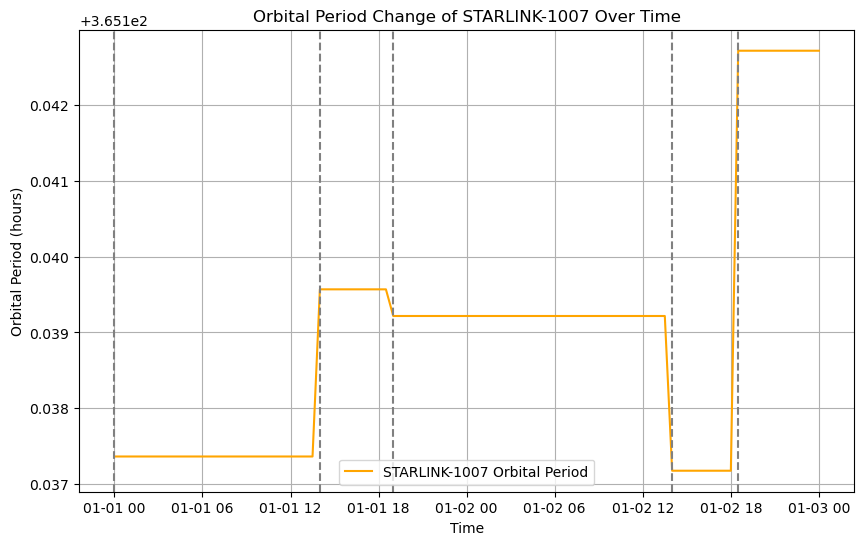

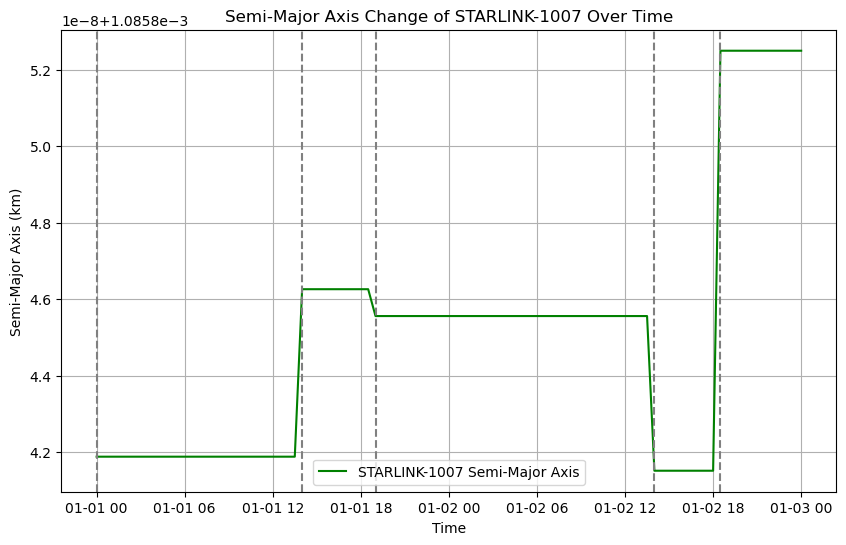

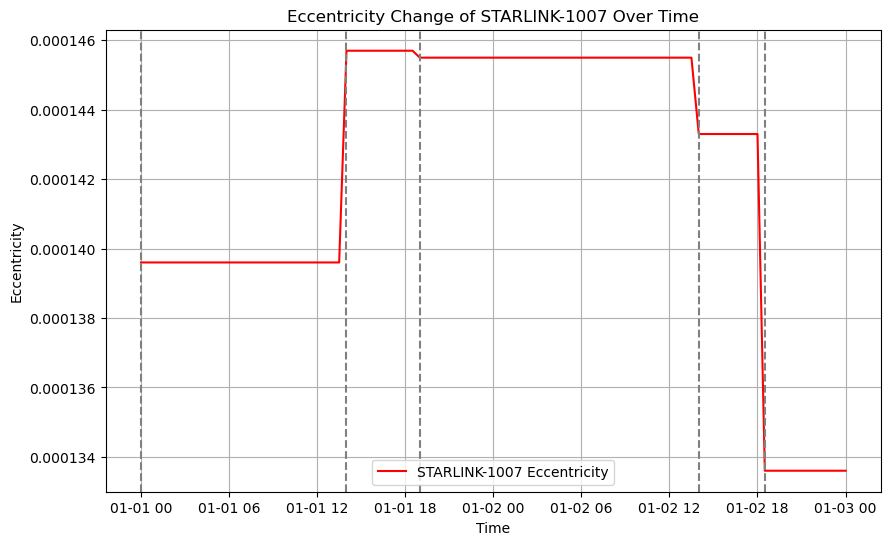

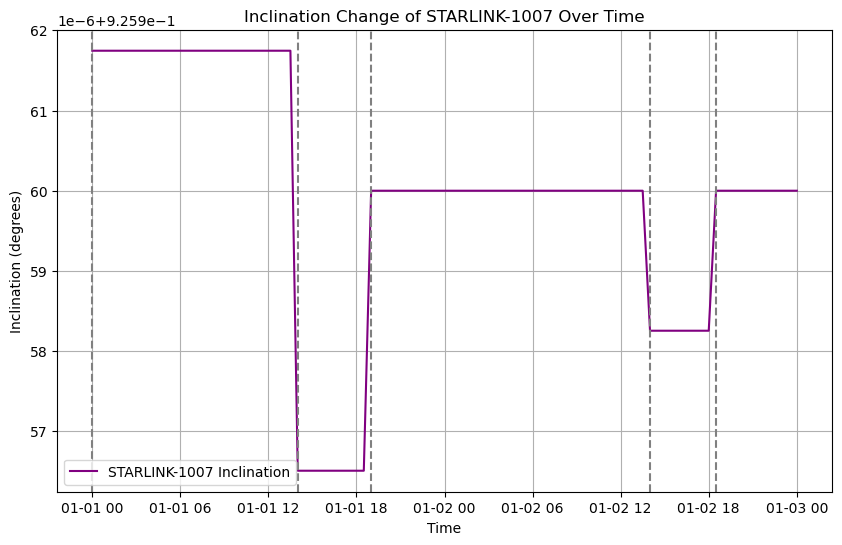

In [22]:

# gemerate time series
start_time = datetime(2024, 1, 1, tzinfo=timezone.utc)
end_time = datetime(2024, 1, 3, tzinfo=timezone.utc)
time_step = timedelta(minutes = 30)
time_series = [start_time + i * time_step for i in range((end_time - start_time) // time_step + 1)]

# 计算每个时间点的卫星海拔
ts = load.timescale()
altitudes = []
periods = []
semi_major_axes = []
eccentricities = []
inclinations = []
times = []
tle_update_times = []  # 记录TLE更新的时间点

tle_index = 0
last_tle_index = -1  # 记录上一个使用的TLE索引

for current_time in time_series:
    # 更新TLE数据
    while tle_index < len(tle_data) - 1 and tle_data[tle_index + 1][0] <= current_time:
        tle_index += 1

    if tle_index != last_tle_index:
        tle_update_times.append(current_time)  # 记录TLE更新的时间点
        last_tle_index = tle_index

    latest_tle = tle_data[tle_index]

    satellite = EarthSatellite(latest_tle[1], latest_tle[2], satellite_name, ts)
    times.append(current_time)

    # calculate orbit period
    mean_motion = satellite.model.no_kozai
    orbital_period_seconds = (24 * 3600) / mean_motion
    orbital_period_hours = orbital_period_seconds / 3600
    periods.append(orbital_period_hours)

    # 计算半长轴、离心率和轨道倾角
    semi_major_axis = satellite.model.a * 1.0E-3  # 单位转换为km
    eccentricity = satellite.model.ecco
    inclination = satellite.model.inclo
    semi_major_axes.append(semi_major_axis)
    eccentricities.append(eccentricity)
    inclinations.append(inclination)


# 绘制轨道周期变化图
plt.figure(figsize=(10, 6))
plt.plot(times, periods, label=f'{satellite_name} Orbital Period', color='orange')
plt.title(f'Orbital Period Change of {satellite_name} Over Time')
plt.xlabel('Time')
plt.ylabel('Orbital Period (hours)')
for tle_update_time in tle_update_times:
    plt.axvline(x=tle_update_time, color='grey', linestyle='--')
plt.grid(True)
plt.legend()

# 绘制半长轴变化图
plt.figure(figsize=(10, 6))
plt.plot(times, semi_major_axes, label=f'{satellite_name} Semi-Major Axis', color='green')
plt.title(f'Semi-Major Axis Change of {satellite_name} Over Time')
plt.xlabel('Time')
plt.ylabel('Semi-Major Axis (km)')
for tle_update_time in tle_update_times:
    plt.axvline(x=tle_update_time, color='grey', linestyle='--')
plt.grid(True)
plt.legend()

# 绘制离心率变化图
plt.figure(figsize=(10, 6))
plt.plot(times, eccentricities, label=f'{satellite_name} Eccentricity', color='red')
plt.title(f'Eccentricity Change of {satellite_name} Over Time')
plt.xlabel('Time')
plt.ylabel('Eccentricity')
for tle_update_time in tle_update_times:
    plt.axvline(x=tle_update_time, color='grey', linestyle='--')
plt.grid(True)
plt.legend()

# 绘制轨道倾角变化图
plt.figure(figsize=(10, 6))
plt.plot(times, inclinations, label=f'{satellite_name} Inclination', color='purple')
plt.title(f'Inclination Change of {satellite_name} Over Time')
plt.xlabel('Time')
plt.ylabel('Inclination (degrees)')
for tle_update_time in tle_update_times:
    plt.axvline(x=tle_update_time, color='grey', linestyle='--')
plt.grid(True)
plt.legend()

plt.show()

In [23]:
# 计算均值、标准差和方差
def calculate_statistics(data):
    return {
        'mean': mean(data),
        'stdev': stdev(data),
        'variance': variance(data)
    }

period_stats = calculate_statistics(periods)
semi_major_axis_stats = calculate_statistics(semi_major_axes)
eccentricity_stats = calculate_statistics(eccentricities)
inclination_stats = calculate_statistics(inclinations)

# 打印统计结果
print(f'Period Statistics: {period_stats}')
print(f'Semi-Major Axis Statistics: {semi_major_axis_stats}')
print(f'Eccentricity Statistics: {eccentricity_stats}')
print(f'Inclination Statistics: {inclination_stats}')

Period Statistics: {'mean': 365.13896120184523, 'stdev': 0.001693654865112328, 'variance': 2.868466802118658e-06}
Semi-Major Axis Statistics: {'mean': 0.0010858450525195274, 'stdev': 3.358080038696334e-09, 'variance': 1.127670154629077e-17}
Eccentricity Statistics: {'mean': 0.00014214123711340205, 'stdev': 4.112576052420382e-06, 'variance': 1.691328178694161e-11}
Inclination Statistics: {'mean': 0.9259599820429786, 'stdev': 1.562996618995894e-06, 'variance': 2.4429584309925962e-12}


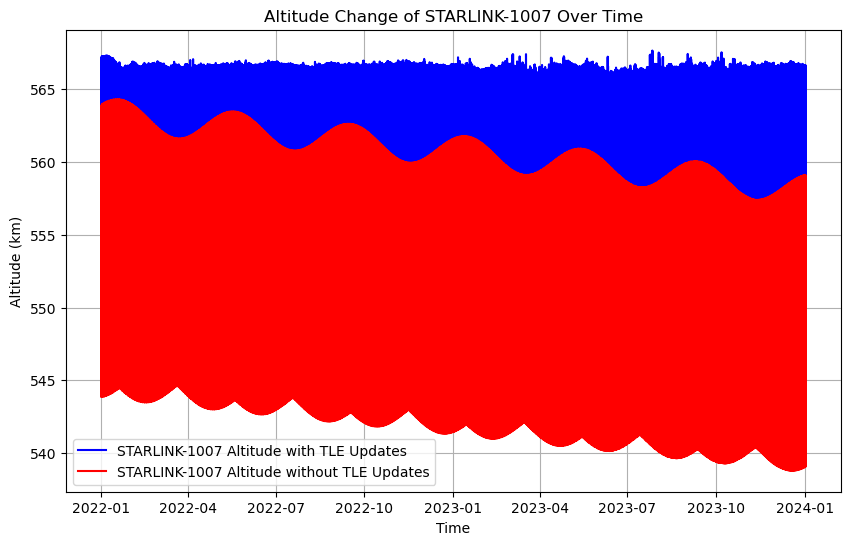

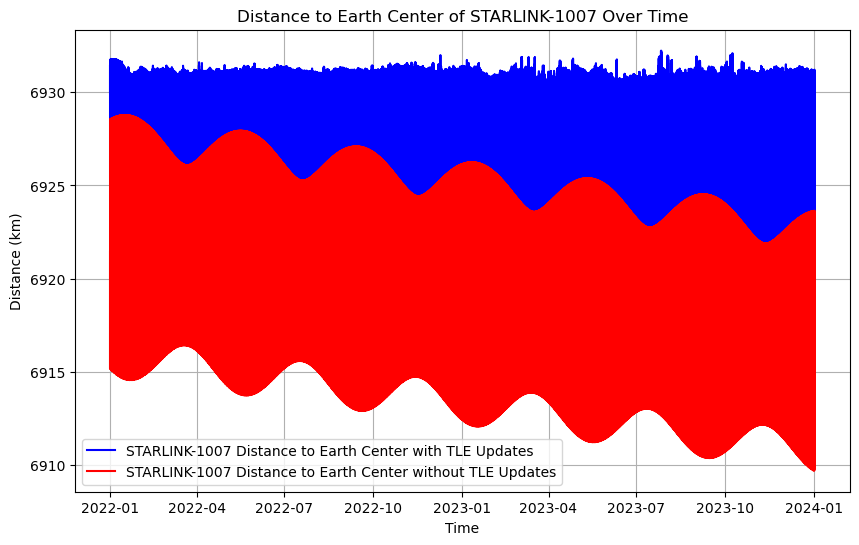

In [24]:


tle_data.sort(key=lambda x: x[0])  # 按历元时间排序

# 生成时间序列
start_time = datetime(2022, 1, 1, tzinfo=timezone.utc)
end_time = datetime(2024, 1, 2, tzinfo=timezone.utc)
time_step = timedelta(minutes=20)
time_series = [start_time + i * time_step for i in range((end_time - start_time) // time_step + 1)]

# 初始化Skyfield时间尺度
ts = load.timescale()

# 计算不断更新TLE数据的轨道参数
altitudes_update = []
latitudes_update = []
longitudes_update = []
distances_update = []
times_update = []
tle_update_times = []  # 记录TLE更新的时间点

tle_index = 0
last_tle_index = -1  # 记录上一个使用的TLE索引

for current_time in time_series:
    # 更新TLE数据
    while tle_index < len(tle_data) - 1 and tle_data[tle_index + 1][0] <= current_time:
        tle_index += 1

    if tle_index != last_tle_index:
        tle_update_times.append(current_time)  # 记录TLE更新的时间点
        last_tle_index = tle_index
    #print(tle_index)
    latest_tle = tle_data[tle_index]
    satellite = EarthSatellite(latest_tle[1], latest_tle[2], satellite_name, ts)
    times_update.append(current_time)

    # 计算海拔、纬度、经度和距离地心
    current_time_ts = ts.utc(current_time.year, current_time.month, current_time.day, current_time.hour, current_time.minute, current_time.second)
    geocentric = satellite.at(current_time_ts)
    subpoint = geocentric.subpoint()
    altitude = subpoint.elevation.km
    latitude = subpoint.latitude.degrees
    longitude = subpoint.longitude.degrees
    distance = geocentric.distance().km

    altitudes_update.append(altitude)
    latitudes_update.append(latitude)
    longitudes_update.append(longitude)
    distances_update.append(distance)

    del satellite

# 计算不更新TLE数据的轨道参数
initial_tle = tle_data[50]
satellite = EarthSatellite(initial_tle[1], initial_tle[2], satellite_name, ts)

altitudes_no_update = []
latitudes_no_update = []
longitudes_no_update = []
distances_no_update = []
times_no_update = []

for current_time in time_series:
    times_no_update.append(current_time)

    # 计算海拔、纬度、经度和距离地心
    current_time_ts = ts.utc(current_time.year, current_time.month, current_time.day, current_time.hour, current_time.minute, current_time.second)
    geocentric = satellite.at(current_time_ts)
    subpoint = geocentric.subpoint()
    altitude = subpoint.elevation.km
    latitude = subpoint.latitude.degrees
    longitude = subpoint.longitude.degrees
    distance = geocentric.distance().km

    altitudes_no_update.append(altitude)
    latitudes_no_update.append(latitude)
    longitudes_no_update.append(longitude)
    distances_no_update.append(distance)

# 比较并绘制两组轨道参数的变化图

# 绘制海拔变化对比图
plt.figure(figsize=(10, 6))
plt.plot(times_update, altitudes_update, label=f'{satellite_name} Altitude with TLE Updates', color='blue')
plt.plot(times_no_update, altitudes_no_update, label=f'{satellite_name} Altitude without TLE Updates', color='red')
plt.title(f'Altitude Change of {satellite_name} Over Time')
plt.xlabel('Time')
plt.ylabel('Altitude (km)')
plt.legend()
plt.grid(True)


# 绘制距离地心的变化对比图
plt.figure(figsize=(10, 6))
plt.plot(times_update, distances_update, label=f'{satellite_name} Distance to Earth Center with TLE Updates', color='blue')
plt.plot(times_no_update, distances_no_update, label=f'{satellite_name} Distance to Earth Center without TLE Updates', color='red')
plt.title(f'Distance to Earth Center of {satellite_name} Over Time')
plt.xlabel('Time')
plt.ylabel('Distance (km)')
plt.legend()
plt.grid(True)

plt.show()

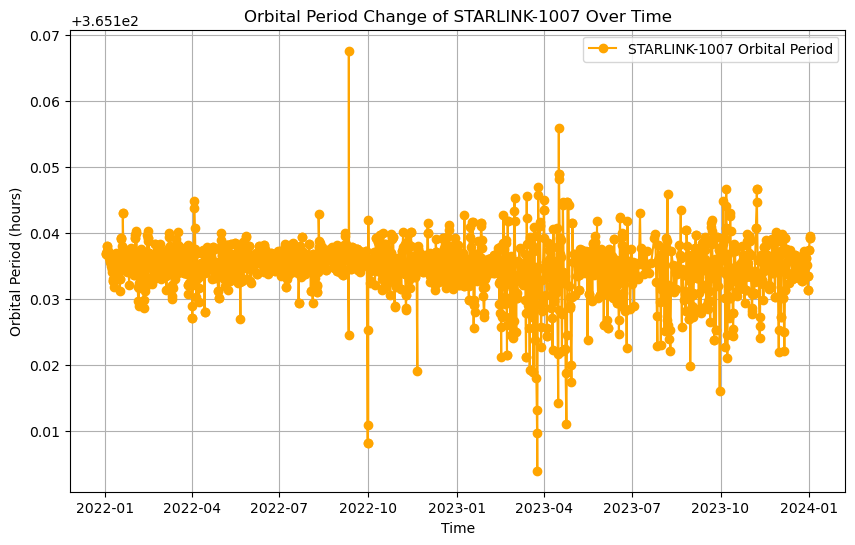

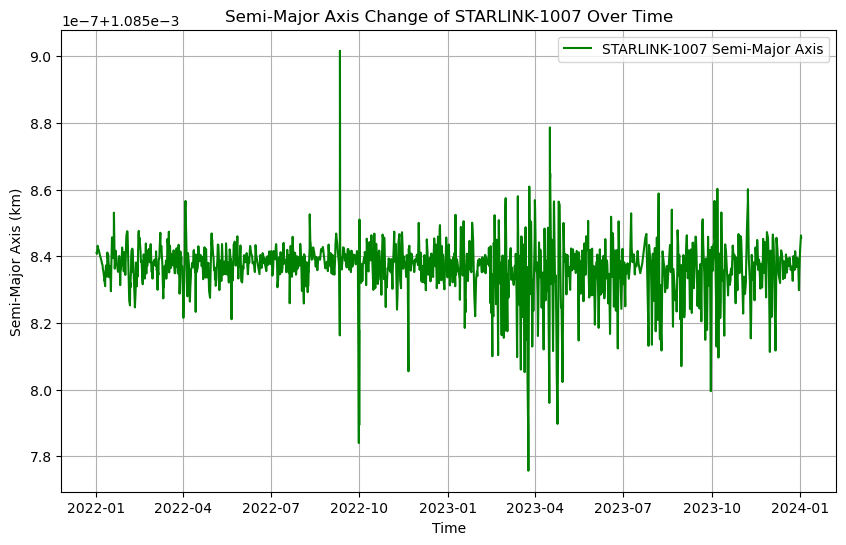

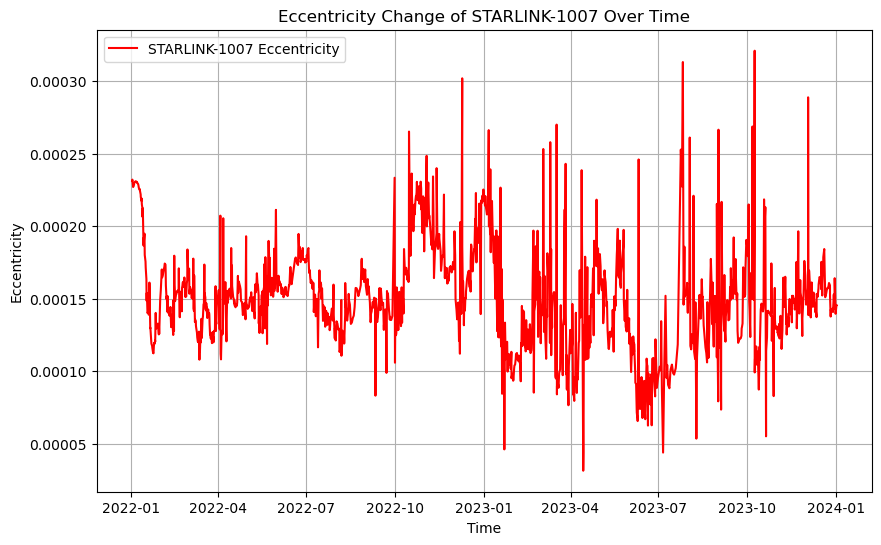

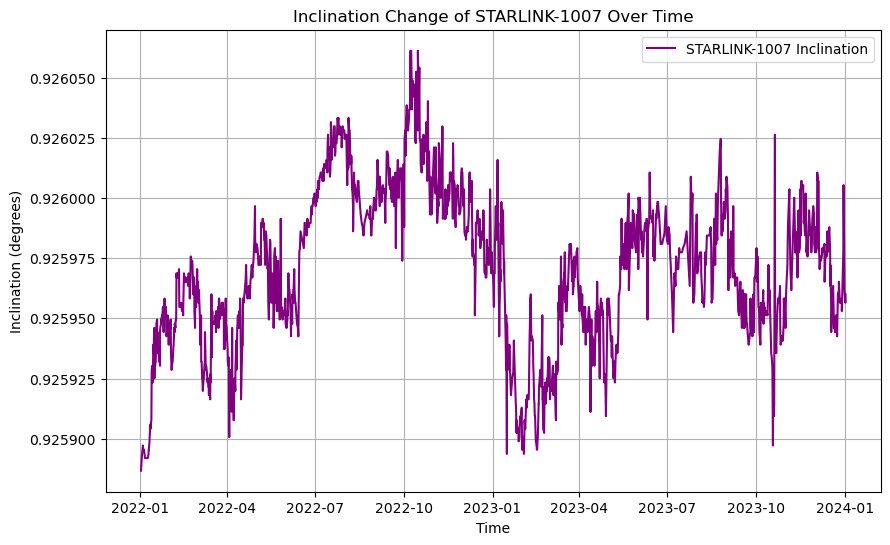

In [25]:
tle_data.sort(key=lambda x: x[0])  # 按历元时间排序

# 初始化Skyfield时间尺度
ts = load.timescale()

# 初始化存储数据的列表
periods = []
semi_major_axes = []
eccentricities = []
inclinations = []
update_times = []

for tle_epoch, tle1, tle2 in tle_data:
    if start_time <= tle_epoch <= end_time:
        satellite = EarthSatellite(tle1, tle2, satellite_name, ts)
        update_times.append(tle_epoch)

        # calculate orbit period
        mean_motion = satellite.model.no_kozai
        orbital_period_seconds = (24 * 3600) / mean_motion
        orbital_period_hours = orbital_period_seconds / 3600
        periods.append(orbital_period_hours)

        # 计算半长轴、离心率和轨道倾角
        semi_major_axis = satellite.model.a * 1.0E-3  # 单位转换为km
        eccentricity = satellite.model.ecco
        inclination = satellite.model.inclo
        semi_major_axes.append(semi_major_axis)
        eccentricities.append(eccentricity)
        inclinations.append(inclination)

# 绘制轨道周期变化图
plt.figure(figsize=(10, 6))
plt.plot(update_times, periods, marker='o', linestyle='-', label=f'{satellite_name} Orbital Period', color='orange')
plt.title(f'Orbital Period Change of {satellite_name} Over Time')
plt.xlabel('Time')
plt.ylabel('Orbital Period (hours)')
plt.grid(True)
plt.legend()

# 绘制半长轴变化图
plt.figure(figsize=(10, 6))
plt.plot(update_times, semi_major_axes, linestyle='-', label=f'{satellite_name} Semi-Major Axis', color='green')
plt.title(f'Semi-Major Axis Change of {satellite_name} Over Time')
plt.xlabel('Time')
plt.ylabel('Semi-Major Axis (km)')
plt.grid(True)
plt.legend()

# 绘制离心率变化图
plt.figure(figsize=(10, 6))
plt.plot(update_times, eccentricities,  linestyle='-', label=f'{satellite_name} Eccentricity', color='red')
plt.title(f'Eccentricity Change of {satellite_name} Over Time')
plt.xlabel('Time')
plt.ylabel('Eccentricity')
plt.grid(True)
plt.legend()

# 绘制轨道倾角变化图
plt.figure(figsize=(10, 6))
plt.plot(update_times, inclinations, linestyle='-', label=f'{satellite_name} Inclination', color='purple')
plt.title(f'Inclination Change of {satellite_name} Over Time')
plt.xlabel('Time')
plt.ylabel('Inclination (degrees)')
plt.grid(True)
plt.legend()

plt.show()

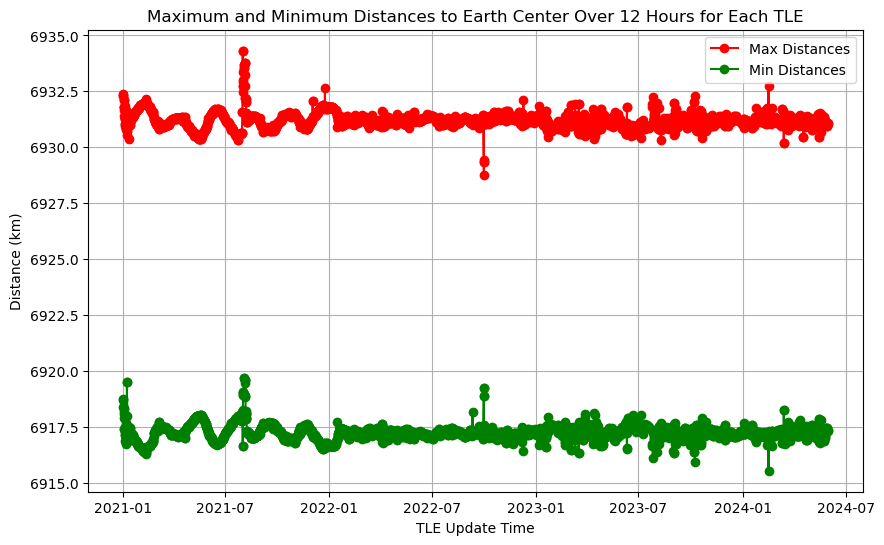

In [26]:
tle_data.sort(key=lambda x: x[0])  # 按历元时间排序

# 初始化Skyfield时间尺度
ts = load.timescale()

# 初始化存储数据的列表
max_distances = []
min_distances = []
update_times = []

# 遍历TLE数据
for tle_epoch, tle1, tle2 in tle_data:
    start_time = tle_epoch
    end_time = tle_epoch + timedelta(hours=12)
    time_step = timedelta(minutes=3)
    time_series = [start_time + i * time_step for i in range((end_time - start_time) // time_step + 1)]

    distances = []

    satellite = EarthSatellite(tle1, tle2, satellite_name, ts)
    for current_time in time_series:
        current_time_ts = ts.utc(current_time.year, current_time.month, current_time.day, current_time.hour, current_time.minute, current_time.second)
        geocentric = satellite.at(current_time_ts)
        distance = geocentric.distance().km
        distances.append(distance)

    # 找到12小时内的最大值和最小值
    max_distance = max(distances)
    min_distance = min(distances)

    max_distances.append(max_distance)
    min_distances.append(min_distance)
    update_times.append(tle_epoch)

# 打印最大值和最小值
#print(f'Maximum Distances: {max_distances}')
#print(f'Minimum Distances: {min_distances}')
#print(f'Update Times: {update_times}')

# 绘制最大值和最小值
plt.figure(figsize=(10, 6))
plt.plot(update_times, max_distances, 'ro-', label='Max Distances')
plt.plot(update_times, min_distances, 'go-', label='Min Distances')
plt.title(f'Maximum and Minimum Distances to Earth Center Over 12 Hours for Each TLE')
plt.xlabel('TLE Update Time')
plt.ylabel('Distance (km)')
plt.grid(True)
plt.legend()
plt.show()

In [15]:
max_distances[-1]

6931.040638803554

In [16]:
# 生成时间序列
start_time = datetime(2023, 1, 1, tzinfo=timezone.utc)
end_time = datetime(2024, 1, 2, tzinfo=timezone.utc)
time_step = timedelta(minutes=3)
time_series = [start_time + i * time_step for i in range((end_time - start_time) // time_step + 1)]

# 初始化Skyfield时间尺度
ts = load.timescale()

# 初始化存储数据的列表
altitudes = []
latitudes = []
longitudes = []
distances = []
times = []
tle_update_times = []  # 记录TLE更新的时间点

tle_index = 0
last_tle_index = -1  # 记录上一个使用的TLE索引
first_tle_index = -1

# 记录局部最大值和最小值时间点
local_max_times = []
local_min_times = []

for current_time in time_series:
    # 选择最接近当前时间的TLE数据
    while tle_index < len(tle_data) - 1 and tle_data[tle_index + 1][0] <= current_time:
        tle_index += 1
        

    if tle_index != last_tle_index:
        tle_update_times.append(current_time)  # 记录TLE更新的时间点
        last_tle_index = tle_index

    latest_tle = tle_data[tle_index]
    # 计算卫星位置
    satellite = EarthSatellite(latest_tle[1], latest_tle[2], satellite_name, ts)
    current_time_ts = ts.utc(current_time.year, current_time.month, current_time.day, current_time.hour, current_time.minute, current_time.second)
    geocentric = satellite.at(current_time_ts)
    subpoint = geocentric.subpoint()
    altitude = subpoint.elevation.km
    latitude = subpoint.latitude.degrees
    longitude = subpoint.longitude.degrees

    altitudes.append(altitude)
    latitudes.append(latitude)
    longitudes.append(longitude)
    times.append(current_time)

    # 计算卫星距离地心的距离
    distance = geocentric.distance().km
    distances.append(distance)

    # 检测局部最大值和最小值
    if len(distances) > 2:
        if distances[-2] > distances[-3] and distances[-2] > distances[-1]:
            local_max_times.append(times[-2])
        if distances[-2] < distances[-3] and distances[-2] < distances[-1]:
            local_min_times.append(times[-2])



Local Maximum Times: [datetime.datetime(2023, 1, 1, 1, 9, tzinfo=datetime.timezone.utc), datetime.datetime(2023, 1, 1, 2, 45, tzinfo=datetime.timezone.utc), datetime.datetime(2023, 1, 1, 4, 18, tzinfo=datetime.timezone.utc), datetime.datetime(2023, 1, 1, 5, 54, tzinfo=datetime.timezone.utc), datetime.datetime(2023, 1, 1, 7, 30, tzinfo=datetime.timezone.utc), datetime.datetime(2023, 1, 1, 9, 6, tzinfo=datetime.timezone.utc), datetime.datetime(2023, 1, 1, 10, 42, tzinfo=datetime.timezone.utc), datetime.datetime(2023, 1, 1, 12, 18, tzinfo=datetime.timezone.utc), datetime.datetime(2023, 1, 1, 13, 54, tzinfo=datetime.timezone.utc), datetime.datetime(2023, 1, 1, 15, 27, tzinfo=datetime.timezone.utc), datetime.datetime(2023, 1, 1, 17, 3, tzinfo=datetime.timezone.utc), datetime.datetime(2023, 1, 1, 18, 39, tzinfo=datetime.timezone.utc), datetime.datetime(2023, 1, 1, 20, 15, tzinfo=datetime.timezone.utc), datetime.datetime(2023, 1, 1, 21, 51, tzinfo=datetime.timezone.utc), datetime.datetime(202

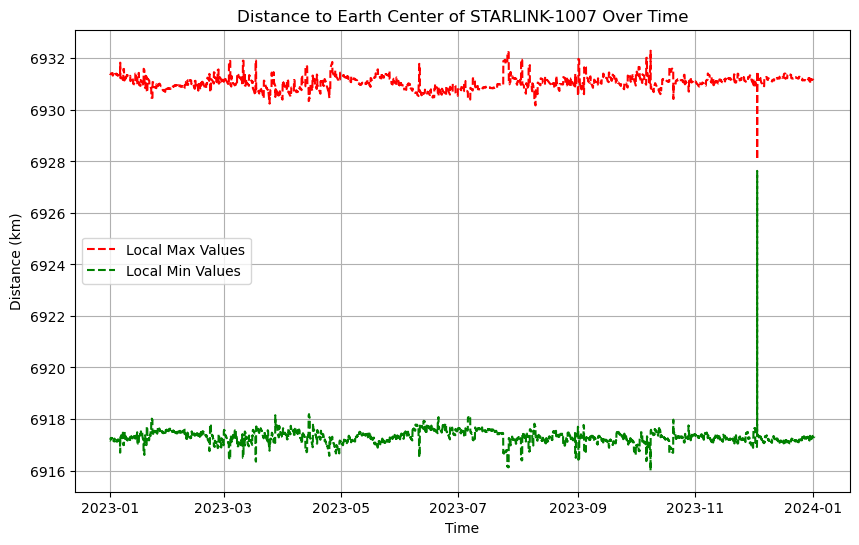

In [17]:
# 绘制距离地心的变化图并标注局部最大值和最小值
plt.figure(figsize=(10, 6))
plt.plot(local_max_times, [distances[times.index(t)] for t in local_max_times], 'r--', label='Local Max Values')
plt.plot(local_min_times, [distances[times.index(t)] for t in local_min_times], 'g--', label='Local Min Values')
plt.title(f'Distance to Earth Center of {satellite_name} Over Time')
plt.xlabel('Time')
plt.ylabel('Distance (km)')
plt.grid(True)
plt.legend()
plt.show()

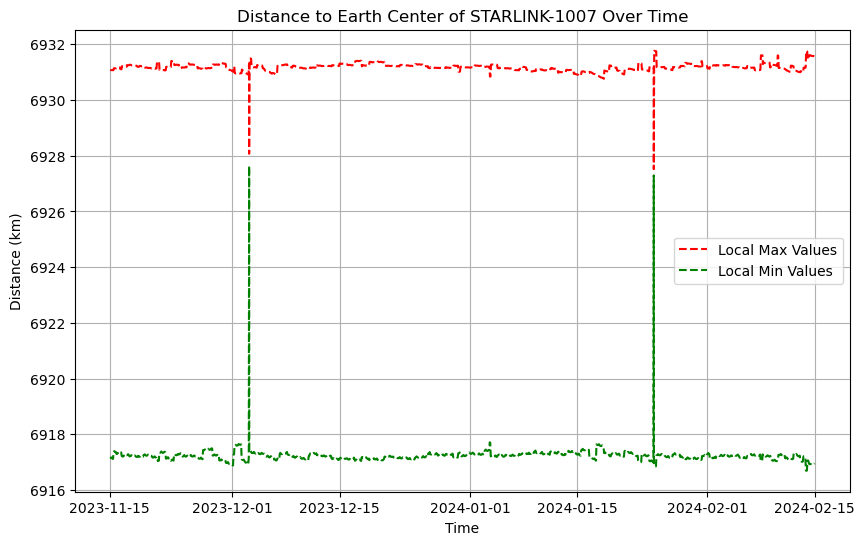

In [26]:
# 生成时间序列
start_time = datetime(2023, 11, 15, tzinfo=timezone.utc)
end_time = datetime(2024, 2, 15, tzinfo=timezone.utc)
time_step = timedelta(minutes=3)
time_series = [start_time + i * time_step for i in range((end_time - start_time) // time_step + 1)]

# 初始化Skyfield时间尺度
ts = load.timescale()

# 初始化存储数据的列表
altitudes = []
latitudes = []
longitudes = []
distances = []
times = []
tle_update_times = []  # 记录TLE更新的时间点

tle_index = 0
last_tle_index = -1  # 记录上一个使用的TLE索引
first_tle_index = -1

# 记录局部最大值和最小值时间点
local_max_times = []
local_min_times = []

for current_time in time_series:
    # 选择最接近当前时间的TLE数据
    while tle_index < len(tle_data) - 1 and tle_data[tle_index + 1][0] <= current_time:
        tle_index += 1
        

    if tle_index != last_tle_index:
        tle_update_times.append(current_time)  # 记录TLE更新的时间点
        last_tle_index = tle_index

    latest_tle = tle_data[tle_index]
    # 计算卫星位置
    satellite = EarthSatellite(latest_tle[1], latest_tle[2], satellite_name, ts)
    current_time_ts = ts.utc(current_time.year, current_time.month, current_time.day, current_time.hour, current_time.minute, current_time.second)
    geocentric = satellite.at(current_time_ts)
    subpoint = geocentric.subpoint()
    altitude = subpoint.elevation.km
    latitude = subpoint.latitude.degrees
    longitude = subpoint.longitude.degrees

    altitudes.append(altitude)
    latitudes.append(latitude)
    longitudes.append(longitude)
    times.append(current_time)

    # 计算卫星距离地心的距离
    distance = geocentric.distance().km
    distances.append(distance)

    # 检测局部最大值和最小值
    if len(distances) > 2:
        if distances[-2] > distances[-3] and distances[-2] > distances[-1]:
            local_max_times.append(times[-2])
        if distances[-2] < distances[-3] and distances[-2] < distances[-1]:
            local_min_times.append(times[-2])

# 绘制距离地心的变化图并标注局部最大值和最小值
plt.figure(figsize=(10, 6))
plt.plot(local_max_times, [distances[times.index(t)] for t in local_max_times], 'r--', label='Local Max Values')
plt.plot(local_min_times, [distances[times.index(t)] for t in local_min_times], 'g--', label='Local Min Values')
plt.title(f'Distance to Earth Center of {satellite_name} Over Time')
plt.xlabel('Time')
plt.ylabel('Distance (km)')
plt.grid(True)
plt.legend()
plt.show()


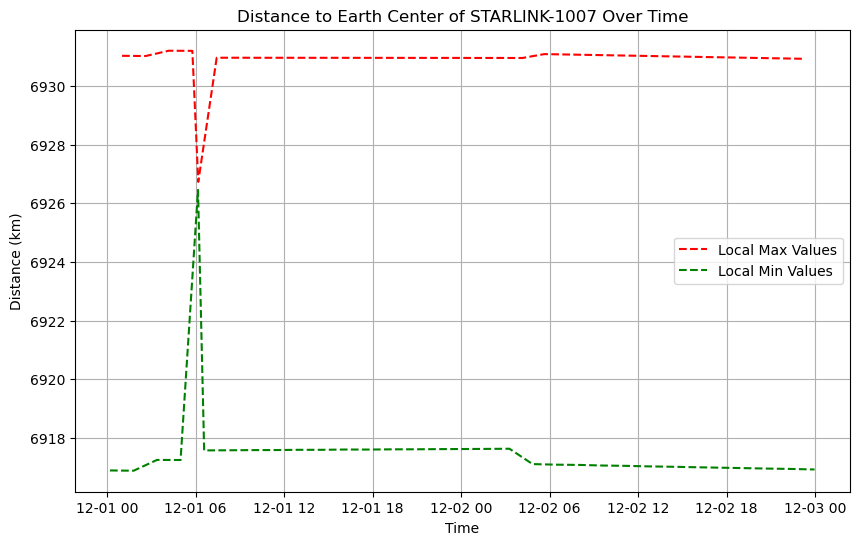

In [28]:
# 生成时间序列
start_time = datetime(2023, 12, 1, tzinfo=timezone.utc)
end_time = datetime(2023, 12, 3, tzinfo=timezone.utc)
time_step = timedelta(minutes=1)
time_series = [start_time + i * time_step for i in range((end_time - start_time) // time_step + 1)]

# 初始化Skyfield时间尺度
ts = load.timescale()

# 初始化存储数据的列表
altitudes = []
latitudes = []
longitudes = []
distances = []
times = []
tle_update_times = []  # 记录TLE更新的时间点

tle_index = 0
last_tle_index = -1  # 记录上一个使用的TLE索引
first_tle_index = -1

# 记录局部最大值和最小值时间点
local_max_times = []
local_min_times = []

for current_time in time_series:
    # 选择最接近当前时间的TLE数据
    while tle_index < len(tle_data) - 1 and tle_data[tle_index + 1][0] <= current_time:
        tle_index += 1
        

    if tle_index != last_tle_index:
        tle_update_times.append(current_time)  # 记录TLE更新的时间点
        last_tle_index = tle_index

    latest_tle = tle_data[tle_index]
    # 计算卫星位置
    satellite = EarthSatellite(latest_tle[1], latest_tle[2], satellite_name, ts)
    current_time_ts = ts.utc(current_time.year, current_time.month, current_time.day, current_time.hour, current_time.minute, current_time.second)
    geocentric = satellite.at(current_time_ts)
    subpoint = geocentric.subpoint()
    altitude = subpoint.elevation.km
    latitude = subpoint.latitude.degrees
    longitude = subpoint.longitude.degrees

    altitudes.append(altitude)
    latitudes.append(latitude)
    longitudes.append(longitude)
    times.append(current_time)

    # 计算卫星距离地心的距离
    distance = geocentric.distance().km
    distances.append(distance)

    # 检测局部最大值和最小值
    if len(distances) > 2:
        if distances[-2] > distances[-3] and distances[-2] > distances[-1]:
            local_max_times.append(times[-2])
        if distances[-2] < distances[-3] and distances[-2] < distances[-1]:
            local_min_times.append(times[-2])

# 绘制距离地心的变化图并标注局部最大值和最小值
plt.figure(figsize=(10, 6))
plt.plot(local_max_times, [distances[times.index(t)] for t in local_max_times], 'r--', label='Local Max Values')
plt.plot(local_min_times, [distances[times.index(t)] for t in local_min_times], 'g--', label='Local Min Values')
plt.title(f'Distance to Earth Center of {satellite_name} Over Time')
plt.xlabel('Time')
plt.ylabel('Distance (km)')
plt.grid(True)
plt.legend()
plt.show()


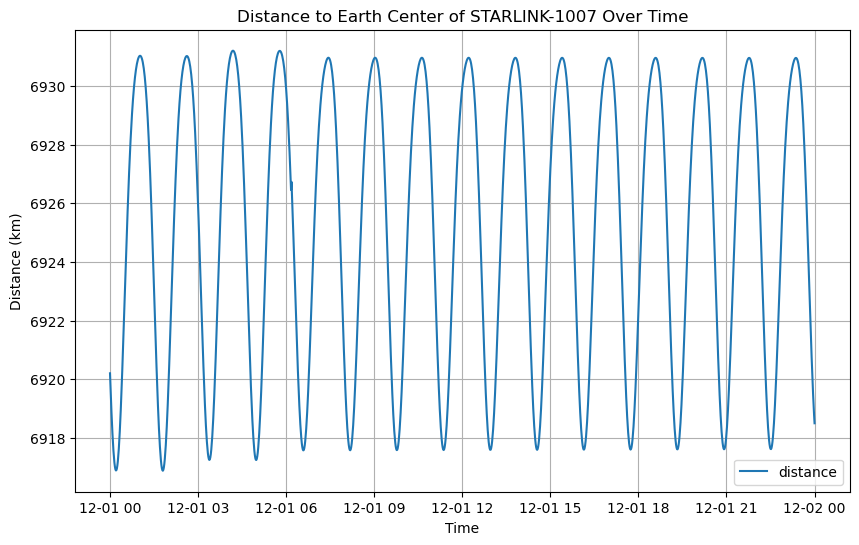

In [32]:
# 生成时间序列
start_time = datetime(2023, 12, 1, tzinfo=timezone.utc)
end_time = datetime(2023, 12, 2, tzinfo=timezone.utc)
time_step = timedelta(minutes=1)
time_series = [start_time + i * time_step for i in range((end_time - start_time) // time_step + 1)]

# 初始化Skyfield时间尺度
ts = load.timescale()

# 初始化存储数据的列表
altitudes = []
latitudes = []
longitudes = []
distances = []
times = []
tle_update_times = []  # 记录TLE更新的时间点

tle_index = 0
last_tle_index = -1  # 记录上一个使用的TLE索引
first_tle_index = -1

# 记录局部最大值和最小值时间点
local_max_times = []
local_min_times = []

for current_time in time_series:
    # 选择最接近当前时间的TLE数据
    while tle_index < len(tle_data) - 1 and tle_data[tle_index + 1][0] <= current_time:
        tle_index += 1
        

    if tle_index != last_tle_index:
        tle_update_times.append(current_time)  # 记录TLE更新的时间点
        last_tle_index = tle_index

    latest_tle = tle_data[tle_index]
    # 计算卫星位置
    satellite = EarthSatellite(latest_tle[1], latest_tle[2], satellite_name, ts)
    current_time_ts = ts.utc(current_time.year, current_time.month, current_time.day, current_time.hour, current_time.minute, current_time.second)
    geocentric = satellite.at(current_time_ts)
    subpoint = geocentric.subpoint()
    altitude = subpoint.elevation.km
    latitude = subpoint.latitude.degrees
    longitude = subpoint.longitude.degrees

    altitudes.append(altitude)
    latitudes.append(latitude)
    longitudes.append(longitude)
    times.append(current_time)

    # 计算卫星距离地心的距离
    distance = geocentric.distance().km
    distances.append(distance)

# 绘制距离地心的变化图并标注局部最大值和最小值
plt.figure(figsize=(10, 6))
plt.plot(times, distances, label='distance')
#plt.plot(local_min_times, [distances[times.index(t)] for t in local_min_times], 'g--', label='Local Min Values')
plt.title(f'Distance to Earth Center of {satellite_name} Over Time')
plt.xlabel('Time')
plt.ylabel('Distance (km)')
plt.grid(True)
plt.legend()
plt.show()


最大值和最小值的变化来源于轨道曲线在相应时间部分有一个中断， TLE数据在这附近不连贯，有相应的变化

从时间上看，轨道有些回滚，可能是时钟时间戳问题或者轨道避障？ 

In [19]:
# 生成时间序列
start_time = datetime(2023, 1, 1, tzinfo=timezone.utc)
end_time = datetime(2024, 1, 2, tzinfo=timezone.utc)
time_step = timedelta(minutes=3)
time_series = [start_time + i * time_step for i in range((end_time - start_time) // time_step + 1)]

# 初始化Skyfield时间尺度
ts = load.timescale()

# 找到start_time之后的第一个TLE数据
first_tle_index = next(i for i, (epoch, _, _) in enumerate(tle_data) if epoch >= start_time)
first_tle = tle_data[first_tle_index]

satellite_first = EarthSatellite(first_tle[1], first_tle[2], satellite_name, ts)

# 初始化存储数据的列表
distances_first_tle = []
distances_latest_tle = []
times = []
local_max_times_first = []
local_min_times_first = []
local_max_times_latest = []
local_min_times_latest = []

# 使用最新的TLE数据进行模拟
tle_index = 0
last_tle_index = -1

for current_time in time_series:
    # 使用第一个TLE数据计算
    current_time_ts = ts.utc(current_time.year, current_time.month, current_time.day, current_time.hour, current_time.minute, current_time.second)
    geocentric_first = satellite_first.at(current_time_ts)
    distance_first = geocentric_first.distance().km
    distances_first_tle.append(distance_first)
    
    # 使用最新的TLE数据计算
    while tle_index < len(tle_data) - 1 and tle_data[tle_index + 1][0] <= current_time:
        tle_index += 1

    latest_tle = tle_data[tle_index]
    satellite_latest = EarthSatellite(latest_tle[1], latest_tle[2], satellite_name, ts)
    geocentric_latest = satellite_latest.at(current_time_ts)
    distance_latest = geocentric_latest.distance().km
    distances_latest_tle.append(distance_latest)
    
    times.append(current_time)

    # 检测局部最大值和最小值
    if len(distances_first_tle) > 2:
        if distances_first_tle[-2] > distances_first_tle[-3] and distances_first_tle[-2] > distances_first_tle[-1]:
            local_max_times_first.append(times[-2])
        if distances_first_tle[-2] < distances_first_tle[-3] and distances_first_tle[-2] < distances_first_tle[-1]:
            local_min_times_first.append(times[-2])
    
    if len(distances_latest_tle) > 2:
        if distances_latest_tle[-2] > distances_latest_tle[-3] and distances_latest_tle[-2] > distances_latest_tle[-1]:
            local_max_times_latest.append(times[-2])
        if distances_latest_tle[-2] < distances_latest_tle[-3] and distances_latest_tle[-2] < distances_latest_tle[-1]:
            local_min_times_latest.append(times[-2])


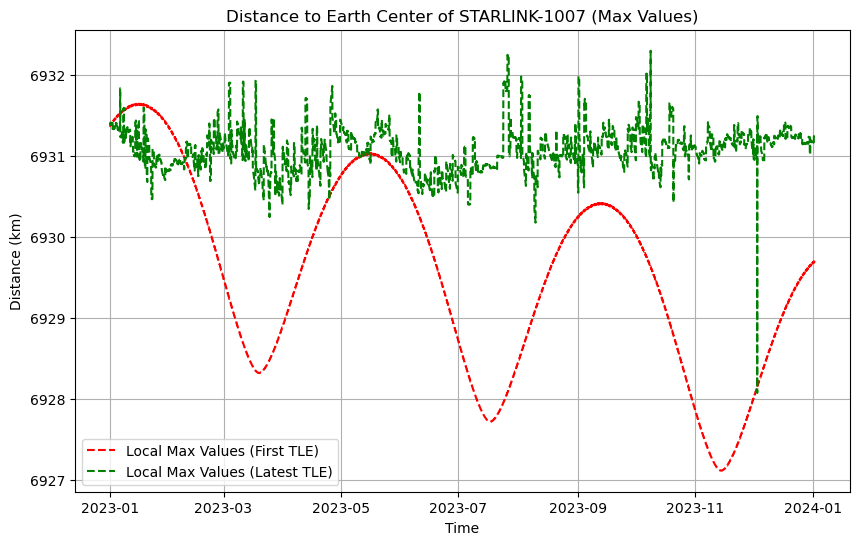

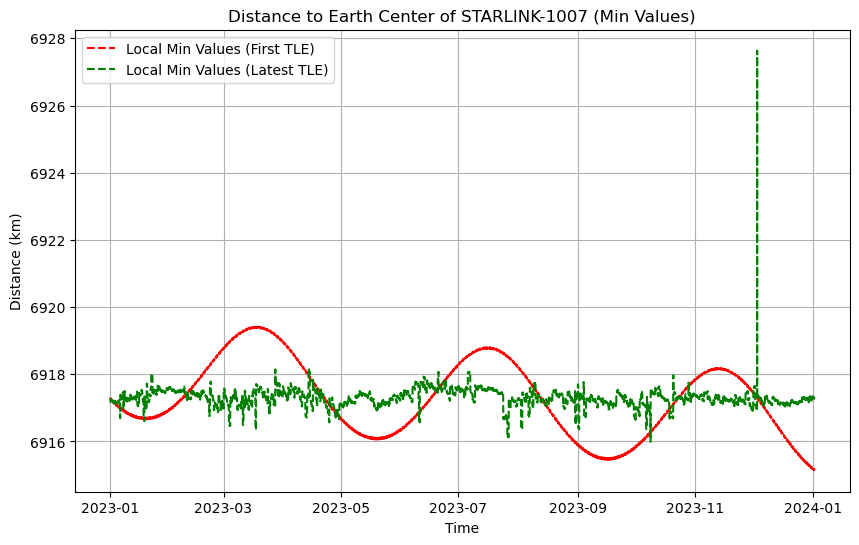

In [20]:
# 绘制距离地心的变化图（局部最大值）
plt.figure(figsize=(10, 6))
#plt.plot(times, distances_first_tle, label='First TLE Distance to Earth Center', color='blue')
#plt.plot(times, distances_latest_tle, label='Latest TLE Distance to Earth Center', color='orange')
plt.plot(local_max_times_first, [distances_first_tle[times.index(t)] for t in local_max_times_first], 'r--', label='Local Max Values (First TLE)')
plt.plot(local_max_times_latest, [distances_latest_tle[times.index(t)] for t in local_max_times_latest], 'g--', label='Local Max Values (Latest TLE)')
plt.title(f'Distance to Earth Center of {satellite_name} (Max Values)')
plt.xlabel('Time')
plt.ylabel('Distance (km)')
plt.grid(True)
plt.legend()
plt.show()

# 绘制距离地心的变化图（局部最小值）
plt.figure(figsize=(10, 6))
#plt.plot(times, distances_first_tle, label='First TLE Distance to Earth Center', color='blue')
#plt.plot(times, distances_latest_tle, label='Latest TLE Distance to Earth Center', color='orange')
plt.plot(local_min_times_first, [distances_first_tle[times.index(t)] for t in local_min_times_first], 'r--', label='Local Min Values (First TLE)')
plt.plot(local_min_times_latest, [distances_latest_tle[times.index(t)] for t in local_min_times_latest], 'g--', label='Local Min Values (Latest TLE)')
plt.title(f'Distance to Earth Center of {satellite_name} (Min Values)')
plt.xlabel('Time')
plt.ylabel('Distance (km)')
plt.grid(True)
plt.legend()
plt.show()

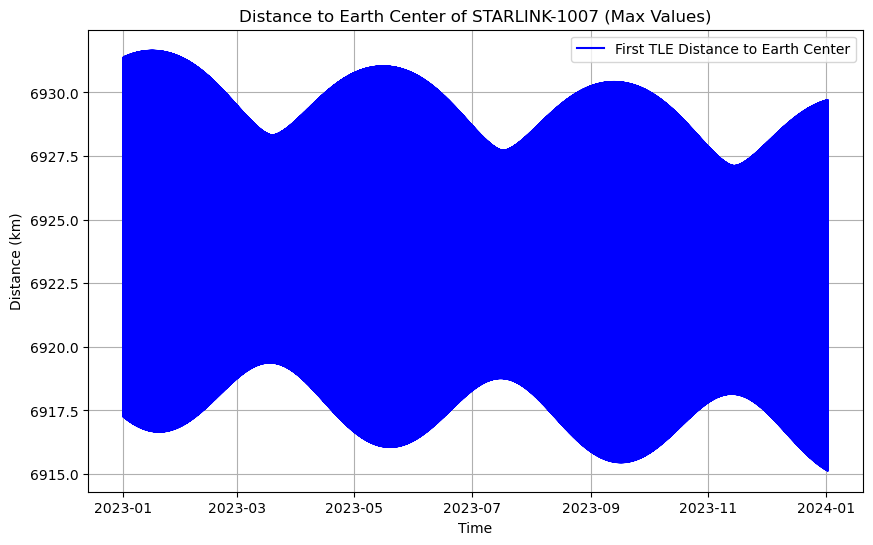

In [21]:
# 绘制距离地心的变化图（局部最大值）
plt.figure(figsize=(10, 6))
plt.plot(times, distances_first_tle, label='First TLE Distance to Earth Center', color='blue')
#plt.plot(times, distances_latest_tle, label='Latest TLE Distance to Earth Center', color='orange')
#plt.plot(local_max_times_first, [distances_first_tle[times.index(t)] for t in local_max_times_first], 'r--', label='Local Max Values (First TLE)')
#plt.plot(local_max_times_latest, [distances_latest_tle[times.index(t)] for t in local_max_times_latest], 'g--', label='Local Max Values (Latest TLE)')
plt.title(f'Distance to Earth Center of {satellite_name} (Max Values)')
plt.xlabel('Time')
plt.ylabel('Distance (km)')
plt.grid(True)
plt.legend()
plt.show()

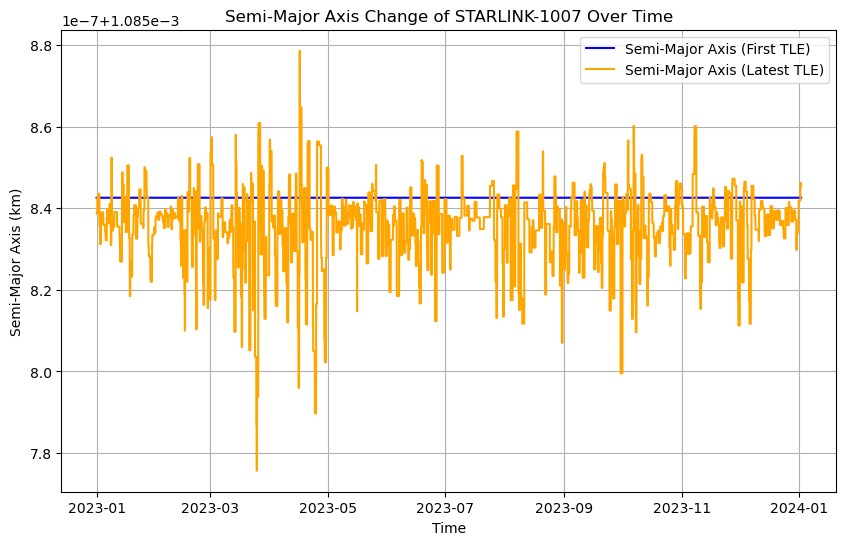

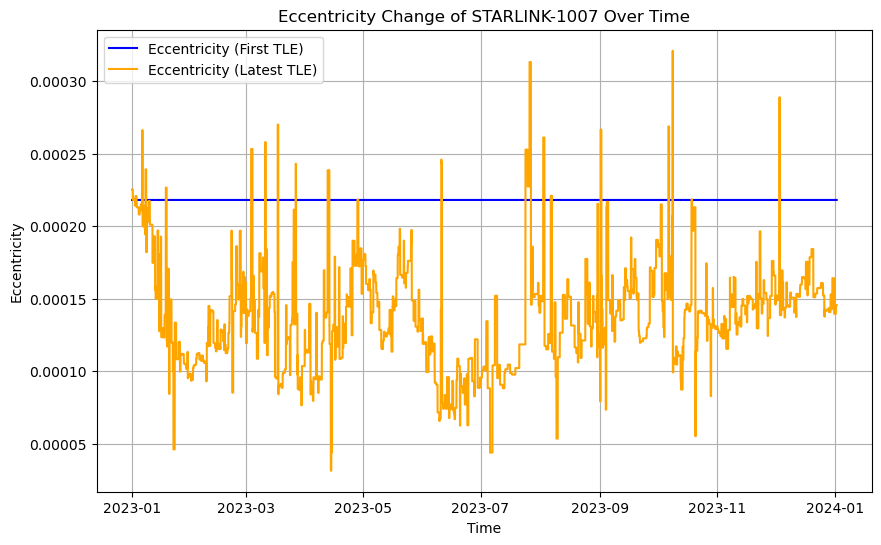

In [22]:
# 生成时间序列
start_time = datetime(2023, 1, 1, tzinfo=timezone.utc)
end_time = datetime(2024, 1, 2, tzinfo=timezone.utc)
time_step = timedelta(minutes=3)
time_series = [start_time + i * time_step for i in range((end_time - start_time) // time_step + 1)]

# 初始化Skyfield时间尺度
ts = load.timescale()

# 找到start_time之后的第一个TLE数据
first_tle_index = next(i for i, (epoch, _, _) in enumerate(tle_data) if epoch >= start_time)
first_tle = tle_data[first_tle_index]
satellite_first = EarthSatellite(first_tle[1], first_tle[2], satellite_name, ts)

# 初始化存储数据的列表
distances_first_tle = []
distances_latest_tle = []
times = []
local_max_times_first = []
local_min_times_first = []
local_max_times_latest = []
local_min_times_latest = []

# 初始化存储轨道参数变化的数据列表
semi_major_axes_first = []
eccentricities_first = []
semi_major_axes_latest = []
eccentricities_latest = []

# 使用最新的TLE数据进行模拟
tle_index = 0
last_tle_index = -1

for current_time in time_series:
    # 使用第一个TLE数据计算
    current_time_ts = ts.utc(current_time.year, current_time.month, current_time.day, current_time.hour, current_time.minute, current_time.second)
    geocentric_first = satellite_first.at(current_time_ts)
    distance_first = geocentric_first.distance().km
    distances_first_tle.append(distance_first)
    
    # 计算半长轴和离心率
    semi_major_axis_first = satellite_first.model.a * 1.0E-3  # 单位转换为km
    eccentricity_first = satellite_first.model.ecco
    semi_major_axes_first.append(semi_major_axis_first)
    eccentricities_first.append(eccentricity_first)

    # 使用最新的TLE数据计算
    while tle_index < len(tle_data) - 1 and tle_data[tle_index + 1][0] <= current_time:
        tle_index += 1

    latest_tle = tle_data[tle_index]
    satellite_latest = EarthSatellite(latest_tle[1], latest_tle[2], satellite_name, ts)
    geocentric_latest = satellite_latest.at(current_time_ts)
    distance_latest = geocentric_latest.distance().km
    distances_latest_tle.append(distance_latest)
    
    # 计算半长轴和离心率
    semi_major_axis_latest = satellite_latest.model.a * 1.0E-3  # 单位转换为km
    eccentricity_latest = satellite_latest.model.ecco
    semi_major_axes_latest.append(semi_major_axis_latest)
    eccentricities_latest.append(eccentricity_latest)
    
    times.append(current_time)


# 绘制半长轴和离心率变化图
plt.figure(figsize=(10, 6))
plt.plot(times, semi_major_axes_first, label='Semi-Major Axis (First TLE)', color='blue')
plt.plot(times, semi_major_axes_latest, label='Semi-Major Axis (Latest TLE)', color='orange')
plt.title(f'Semi-Major Axis Change of {satellite_name} Over Time')
plt.xlabel('Time')
plt.ylabel('Semi-Major Axis (km)')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(times, eccentricities_first, label='Eccentricity (First TLE)', color='blue')
plt.plot(times, eccentricities_latest, label='Eccentricity (Latest TLE)', color='orange')
plt.title(f'Eccentricity Change of {satellite_name} Over Time')
plt.xlabel('Time')
plt.ylabel('Eccentricity')
plt.grid(True)
plt.legend()
plt.show()